# Iteracyjne metody rozwiązywania równań liniowych #

Podstawowe równanie liniowe, które będziemy rozwiązywać to:

In [1]:
A = [
    [4, -1, -0.2, 2],
    [-1, 5, 0, -2],
    [0.2, 1, 10, -1],
    [0, -2, -1, 4]
]
b = [30, 0, -10, 5];

x = [x1, x2, x3, x4]


Ax=b

# Metoda Jacobiego #

Metoda Jakobiego jest iteracyjnym algorytmem służącym do rozwiązywania układów równań liniowych. Jest szczególnie przydatna w przypadku dużych układów, gdzie metody bezpośrednie (takie jak eliminacja Gaussa) mogą być zbyt kosztowne obliczeniowo. Metoda ta polega na rozkładzie macierzy na jej część diagonalną, dolnotrójkątną i górnotrójkątną, a następnie iteracyjnym udoskonalaniu wektora rozwiązania aż do osiągnięcia zbieżności.

### x(n+1)=D^(-1)*(b-(L+U)x(n))
gdzie:
- **x(n+1)** to nowe przybliżenie wektora rozwiązania.
- **D** to część diagonalna macierzy A.
- **L** to część dolnotrójkątna macierzy A.
- **U** to część górnotrójkątna macierzy A.
- **b** to wektor stałych z układu równań.
- **x(n)** to bieżące przybliżenie wektora rozwiązania.
- **n** to numer iteracji.

Zbieżność zachodzi, gdy:
- macierz A jest diagonalnie dominująca, co oznacza, że dla każdego wiersza macierzy wartość bezwzględna elementu diagonalnego jest większa niż suma wartości bezwzględnych pozostałych elementów w tym wierszu.
- macierz A jest symetryczna i dodatnio określona, co oznacza, że dla każdego wektora x różnego od zera, iloczyn skalarny Ax z x jest dodatni.
- lub promień spektralny macierzy iteracyjnej jest mniejszy od 1, co oznacza, że metoda będzie zbieżna niezależnie od początkowego przybliżenia.

### Implementacja metody Jacobiego ###

In [2]:
import numpy as np

In [3]:
U = np.triu(A,k=1)
D = np.diag(np.diag(A))
L = np.tril(A,k=-1)

In [4]:
N= np.linalg.inv(D)
x=np.zeros_like(b)
LU=L+U
tolerance = 1e-12
iteration = 100000
old_x=x.copy()
while iteration > 0:
    x = N @ (b - LU @ x)
    if np.linalg.norm(x-old_x) < tolerance:
        break
    old_x=x
    iteration-=1
print(x)
print(1000000-iteration)

[ 6.96156056  2.22112253 -1.15414086  2.07202605]
900059


### Tworzenie funkcji ###

In [31]:
def jacobi(A, b, tol=1e-8, max_iteration=100_000_000):
    x = np.zeros_like(b)
    U = np.triu(A, k=1)
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    LU = L + U
    N = np.linalg.inv(D)
    old_x = x.copy()
    
    while max_iteration > 0:
        x = N @ (b - LU @ x)
        if np.linalg.norm(x - old_x) < tol:
            return x
        old_x = x.copy()
        max_iteration -= 1
    
    print("Warning: Method did not converge within the maximum number of iterations.")
    return x


In [6]:
print(jacobi(A,b))

[ 6.96156057  2.22112253 -1.15414086  2.07202605]


## Wnioski ### 
Ta metoda jest praktyczna, łatwa do wdrożenia i zrozumienia. Jednakże, jeśli wymagana jest bardzo wysoka precyzja, może być mniej odpowiednia, ponieważ nigdy nie uzyskamy dokładnego rozwiązania—tylko przybliżenie w pewnym zakresie tolerancji.

### Metoda Gaussa-Seidela ###

Metoda Gaussa-Seidela jest techniką iteracyjną służącą do rozwiązywania układów równań liniowych. Poprawia ona metodę Jacobiego poprzez wykorzystanie najnowszych obliczonych wartości w obliczeniach kolejnej wartości, co często prowadzi do szybszej zbieżności. Metoda ta jest szczególnie skuteczna dla macierzy diagonalnie dominujących lub symetrycznych dodatnio określonych. 
## x(n+1)=(D+L)^(-1)*(b-Ux(n))
gdzie:
- **x(n+1)** to nowe przybliżenie wektora rozwiązania.
- **D** to część diagonalna macierzy A.
- **L** to część dolnotrójkątna macierzy A.
- **U** to część górnotrójkątna macierzy A.
- **b** to wektor stałych z układu równań.
- **x(n)** to bieżące przybliżenie wektora rozwiązania.
- **n** to numer iteracji.

Zbieżność zachodzi, gdy:
- Macierz A jest diagonalnie dominująca, co oznacza, że dla każdego wiersza macierzy wartość bezwzględna elementu diagonalnego jest większa niż suma wartości bezwzględnych pozostałych elementów w tym wierszu.
- Macierz A jest określona dodatnio, co oznacza, że dla każdego wektora x różnego od zera, iloczyn skalarny Ax z x jest dodatni.
- Lub promień spektralny macierzy iteracyjnej jest mniejszy od 1, co oznacza, że metoda będzie zbieżna niezależnie od początkowego przybliżenia.

### Implementacja metody Gaussa-Seidela ###

In [7]:
U = np.triu(A,k=1)
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
print(L)
print(U)

[[ 0.   0.   0.   0. ]
 [-1.   0.   0.   0. ]
 [ 0.2  1.   0.   0. ]
 [ 0.  -2.  -1.   0. ]]
[[ 0.  -1.  -0.2  2. ]
 [ 0.   0.   0.  -2. ]
 [ 0.   0.   0.  -1. ]
 [ 0.   0.   0.   0. ]]


In [8]:
Inverse = np.linalg.inv(D+L)

In [9]:
tolerance = 1e-8
iteration = 100_000
x = np.zeros_like(b)
old_x=x.copy()
for iteration in range(iteration):
    x= Inverse @ (b - U @ x)
    if np.linalg.norm(x-old_x) < tolerance:
        break
    old_x=x

print(x)

[ 6.96156056  2.22112253 -1.15414086  2.07202605]


### Tworzenie funkcji ###

In [32]:
def gauss_seidel(A, b, tol=1e-8, max_iteration=100_000_000):
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    x = np.zeros_like(b)
    Inverse = np.linalg.inv(np.diag(np.diag(A)) + L)
    old_x = x.copy()
    
    for iteration in range(max_iteration):
        x = Inverse @ (b - U @ x)
        
        if np.linalg.norm(x - old_x) < tol:
            return x
        old_x = x.copy()
    
    print("Warning: Method did not converge within the maximum number of iterations.")
    return x

In [11]:
print(gauss_seidel(A, b))

[ 6.96156056  2.22112253 -1.15414086  2.07202605]


### Wnioski ###
Metoda Gaussa-Seidela jest bardziej efektywna niż metoda Jacobiego, ponieważ wykorzystuje najnowsze obliczone wartości w kolejnych iteracjach, co przyspiesza zbieżność. Dzięki temu może wymagać mniejszej liczby iteracji do osiągnięcia rozwiązania. Jednakże, jest to bardziej skomplikowana metoda do implementacji i jest mniej intuicyjna.


# Metoda SOR #
Metoda SOR (Successive Over-Relaxation) jest rozszerzeniem metody Gaussa-Seidela, która wprowadza dodatkowy współczynnik relaksacji (omega) w celu przyspieszenia zbieżności. Metoda ta jest szczególnie skuteczna dla macierzy diagonalnie dominujących lub symetrycznych dodatnio określonych. Dzięki zastosowaniu współczynnika relaksacji, metoda SOR może osiągnąć zbieżność szybciej niż standardowa metoda Gaussa-Seidela.

### sigma = sum(A[i][j] * x_new[j] if j < i else A[i][j] * x[j] for j in range(n) if j != i) -> zmienna sigma jest sumą iloczynów elementów macierzy A i wektora x, gdzie dla każdego wiersza i, elementy przed przekątną są mnożone przez wartości z nowego wektora x_new, a elementy po przekątnej przez wartości z bieżącego wektora x.
# X(n+1) = (1 - omega) * x(n) + (omega / A[i][i]) * (b[i] - sigma)
gdzie: 
- **x(n+1)** to nowe przybliżenie wektora rozwiązania.
- **omega** to współczynnik relaksacji, który kontroluje szybkość zbieżności.
- **x(n)** to bieżące przybliżenie wektora rozwiązania.
- **A[i][i]** to element diagonalny macierzy A w wierszu i.
- **b[i]** to element wektora stałych b w wierszu i.
- **sigma** to suma iloczynów elementów macierzy A i wektora x, gdzie dla każdego wiersza i, elementy przed przekątną są mnożone przez wartości z nowego wektora x_new, a elementy po przekątnej przez wartości z bieżącego wektora x.
- **n** to numer iteracji.

Zbieżność zachodzi, gdy:
- Macierz A jest dodatnio określona, co oznacza, że dla każdego wektora x różnego od zera, iloczyn skalarny Ax z x jest dodatni.
- Macierz A jest diagonalnie dominująca, to rownież metoda SOR dla 0<omega<2 jest zbieżna.
- Lub promień spektralny macierzy iteracyjnej jest mniejszy od 1, co oznacza, że metoda będzie zbieżna niezależnie od początkowego przybliżenia.


# Implementacja metody SOR

In [12]:
omega = 1.25
L = np.tril(A, k=-1)
D = np.diag(np.diag(A))
U = np.triu(A, k=1)
Inverse = np.linalg.inv(D + omega * L)

In [13]:
tolerance = 1e-8
iteration = 100_000
x = np.zeros_like(b, dtype=float)
old_x=x.copy()
n= len(b)
while iteration > 0:
        x_new = x.copy()
        for i in range(n):
            sigma = sum(A[i][j] * x_new[j] if j < i else A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (1 - omega) * x[i] + (omega / A[i][i]) * (b[i] - sigma)
            if np.linalg.norm(x_new - x) < tolerance:
                break
        x = x_new
        iteration -= 1

print(x)

[ 6.96156056  2.22112253 -1.15414086  2.07202605]


### Tworzenie funkcji ###

In [25]:
import numpy as np

def sor(A, b, omega=1.25, tol=1e-8, max_iteration=100_000_000):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)
    x = np.zeros_like(b)

    for _ in range(max_iteration):
        x_new = x.copy()
        for i in range(n):
            row = A[i]
            sigma = np.dot(row[:i], x_new[:i]) + np.dot(row[i+1:], x[i+1:])
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - sigma)

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new

    print("Warning: Method did not converge within the maximum number of iterations.")
    return x




### Wnioski ###
Ta metoda dzięki relaksacji jest szybsza niż metoda Gaussa-Seidela, ale wymaga dobrania odpowiedniego współczynnika relaksacji (omega). Jeśli omega jest zbyt małe, zbieżność może być wolna, a jeśli zbyt duże, może prowadzić do niestabilności. W praktyce, wartość omega jest często dobierana eksperymentalnie lub na podstawie analizy macierzy A.

#Porównanie wyników metod #

In [15]:
print(sor(A, b))
print(jacobi(A, b))
print(gauss_seidel(A, b))
print(np.linalg.solve(A, b))

[ 6.96156057  2.22112253 -1.15414086  2.07202605]
[ 6.96156057  2.22112253 -1.15414086  2.07202605]
[ 6.96156056  2.22112253 -1.15414086  2.07202605]
[ 6.96156056  2.22112253 -1.15414086  2.07202605]


# Comparison of methods #

Rozmiar macierzy: 3x3


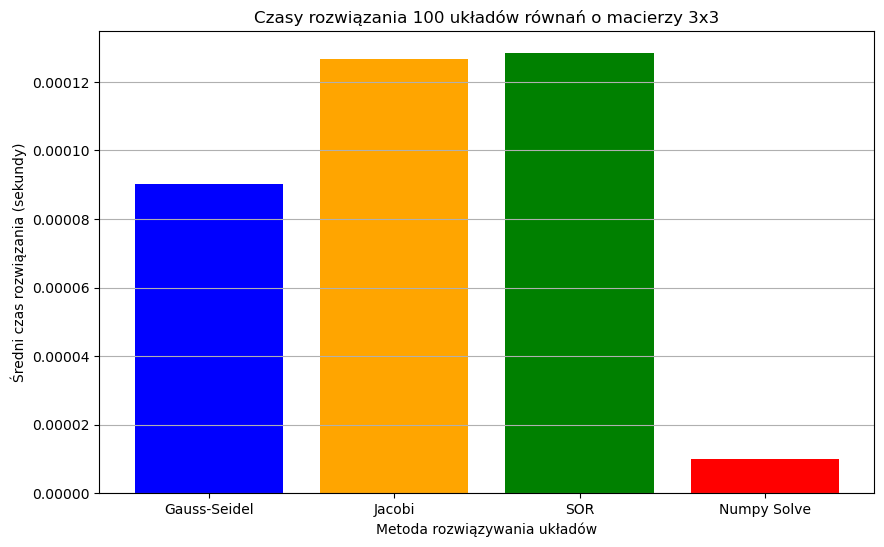

Rozmiar macierzy: 50x50


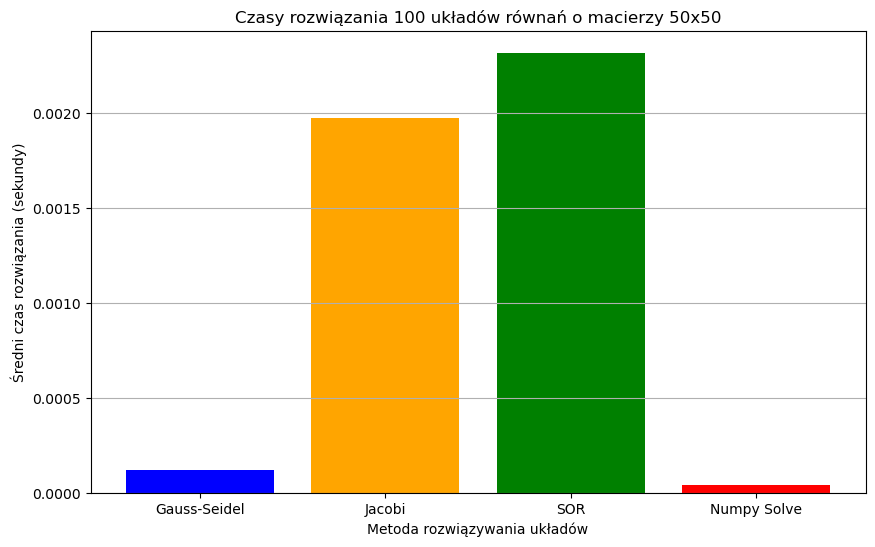

Rozmiar macierzy: 100x100


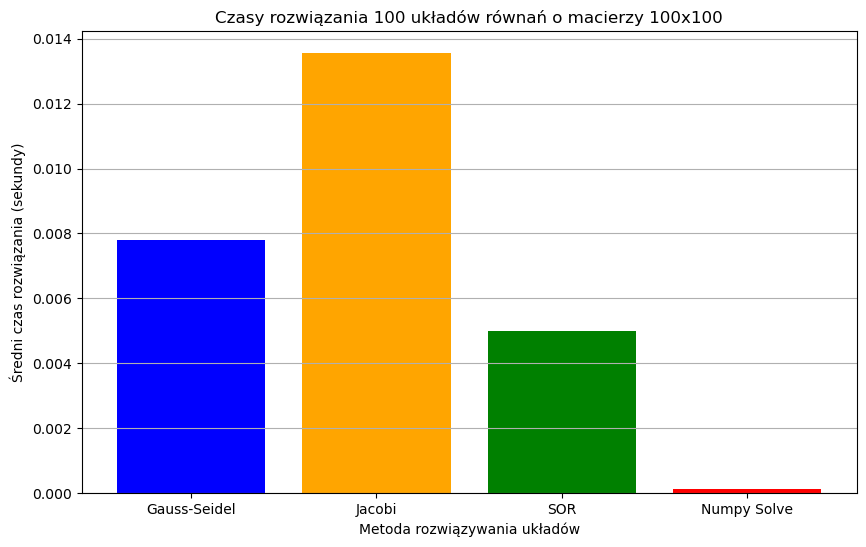

Rozmiar macierzy: 200x200


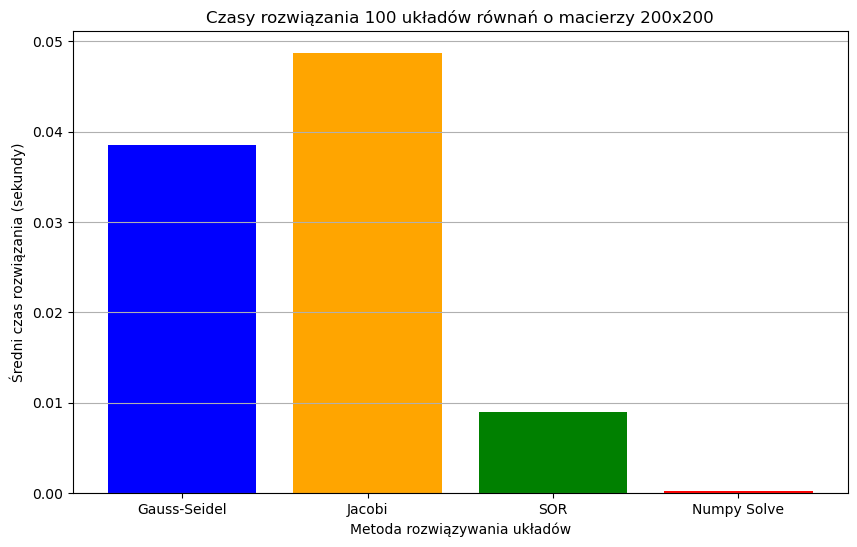

Rozmiar macierzy: 250x250


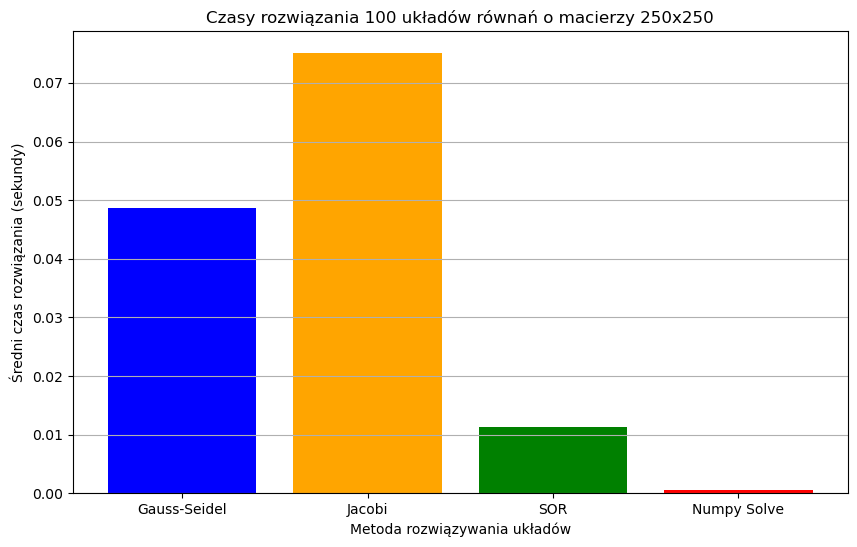

Rozmiar macierzy: 500x500


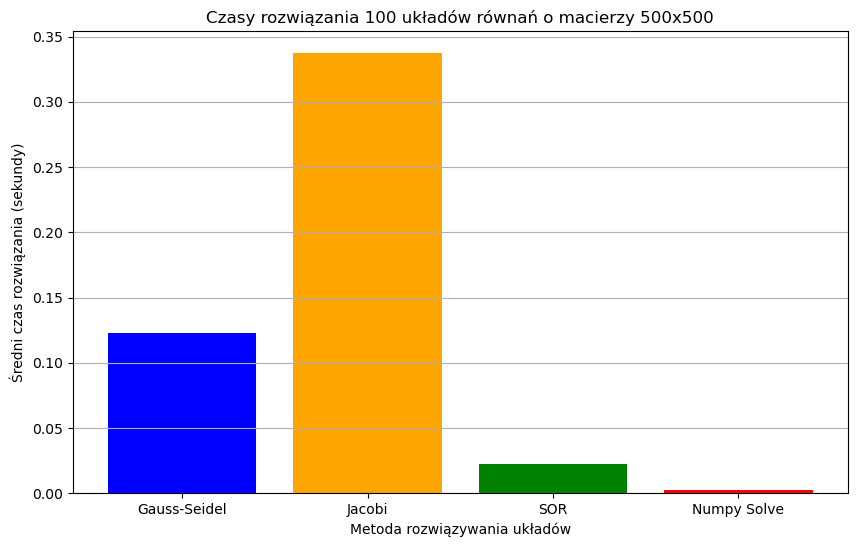

Rozmiar macierzy: 750x750


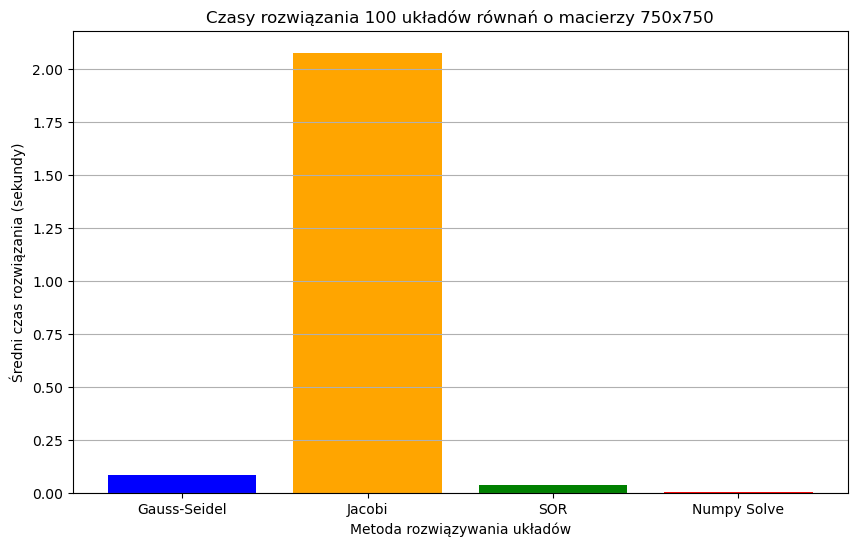

Rozmiar macierzy: 1000x1000


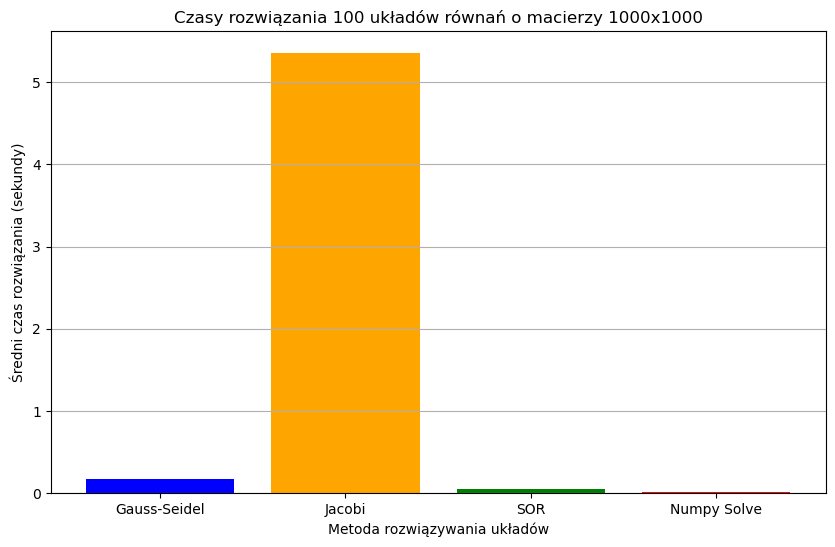

In [16]:
import time
import matplotlib.pyplot as plt

def measure_time(method, A, b):
    start_time = time.time()
    try:
        result = method(A, b)
    except:
        result = None
    end_time = time.time()
    return result, end_time - start_time

def generate_diagonally_dominant_matrix_and_vector(rows, cols=None):
    if cols is None:
        cols = rows
    A = np.random.rand(rows, cols)
    if rows == cols:
        for i in range(rows):
            A[i, i] = np.sum(np.abs(A[i])) + np.random.rand()
    b = np.random.rand(rows)
    return A, b

def compare_methods_for_sizes(sizes, liczba_ukladow=100):
    methods = {
        'Gauss-Seidel': gauss_seidel,
        'Jacobi': jacobi,
        'SOR': sor,
        'Numpy Solve': np.linalg.solve
    }

    for size in sizes:
        rows, cols = (size, size) if isinstance(size, int) else size
        print(f"Rozmiar macierzy: {rows}x{cols}")
        czasy = {name: [] for name in methods.keys()}

        for _ in range(liczba_ukladow):
            A, b = generate_diagonally_dominant_matrix_and_vector(rows, cols)
            for name, method in methods.items():
                _, elapsed_time = measure_time(method, A, b)
                czasy[name].append(elapsed_time)

        srednie_czasy = {name: np.mean(times) for name, times in czasy.items()}

        plt.figure(figsize=(10, 6))
        nazwy = list(srednie_czasy.keys())
        wartosci = list(srednie_czasy.values())

        plt.bar(nazwy, wartosci, color=['blue', 'orange', 'green', 'red', 'purple'])
        plt.xlabel('Metoda rozwiązywania układów')
        plt.ylabel('Średni czas rozwiązania (sekundy)')
        plt.title(f'Czasy rozwiązania {liczba_ukladow} układów równań o macierzy {rows}x{cols}')
        plt.grid(axis='y')
        plt.show()

sizes = [3, 50,100,200, 250,500,750,1000]
compare_methods_for_sizes(sizes, liczba_ukladow=100)


### Wnioski z porównania metod iteracyjnych: Gaussa-Seidla, Jacobiego i SOR ###

---

### Metoda SOR (Successive Over-Relaxation) ####

- Najskuteczniejsza dla dużych układów równań (np. macierzy 1000×100).
- Charakteryzuje się najkrótszym czasem zbieżności oraz najmniejszą liczbą iteracji spośród wszystkich metod.
- Wadą jest to, że dla małych układów (np. 3×3) czas obliczeń bywa dłuższy, co wynika z większej złożoności pojedynczej iteracji, która nie jest rekompensowana przy małej liczbie zmiennych.

---

### Metoda Gaussa-Seidla ####

- Jest wydajniejsza niż metoda Jacobiego.
- Wykorzystuje zaktualizowane wartości zmiennych w trakcie tej samej iteracji, co przyspiesza zbieżność w porównaniu do metody Jacobiego.
- Często wymaga mniejszej liczby iteracji do osiągnięcia zadanej dokładności.

---

### Metoda Jacobiego ###

- Najwolniejsza spośród porównywanych metod.
- Wymaga największej liczby iteracji do uzyskania dokładnego rozwiązania, co przekłada się na najdłuższy czas działania.
- Jej zaletą jest prostota implementacji oraz możliwość łatwej równoległości obliczeń, co może być korzystne przy wykorzystaniu architektur takich jak GPU lub systemy rozproszone.
---

# Analiza zbieżności metod iteracyjnych #

Minimalnie edytuje funkcje aby zwracały potrzebne dane do stowrzenia wykresów

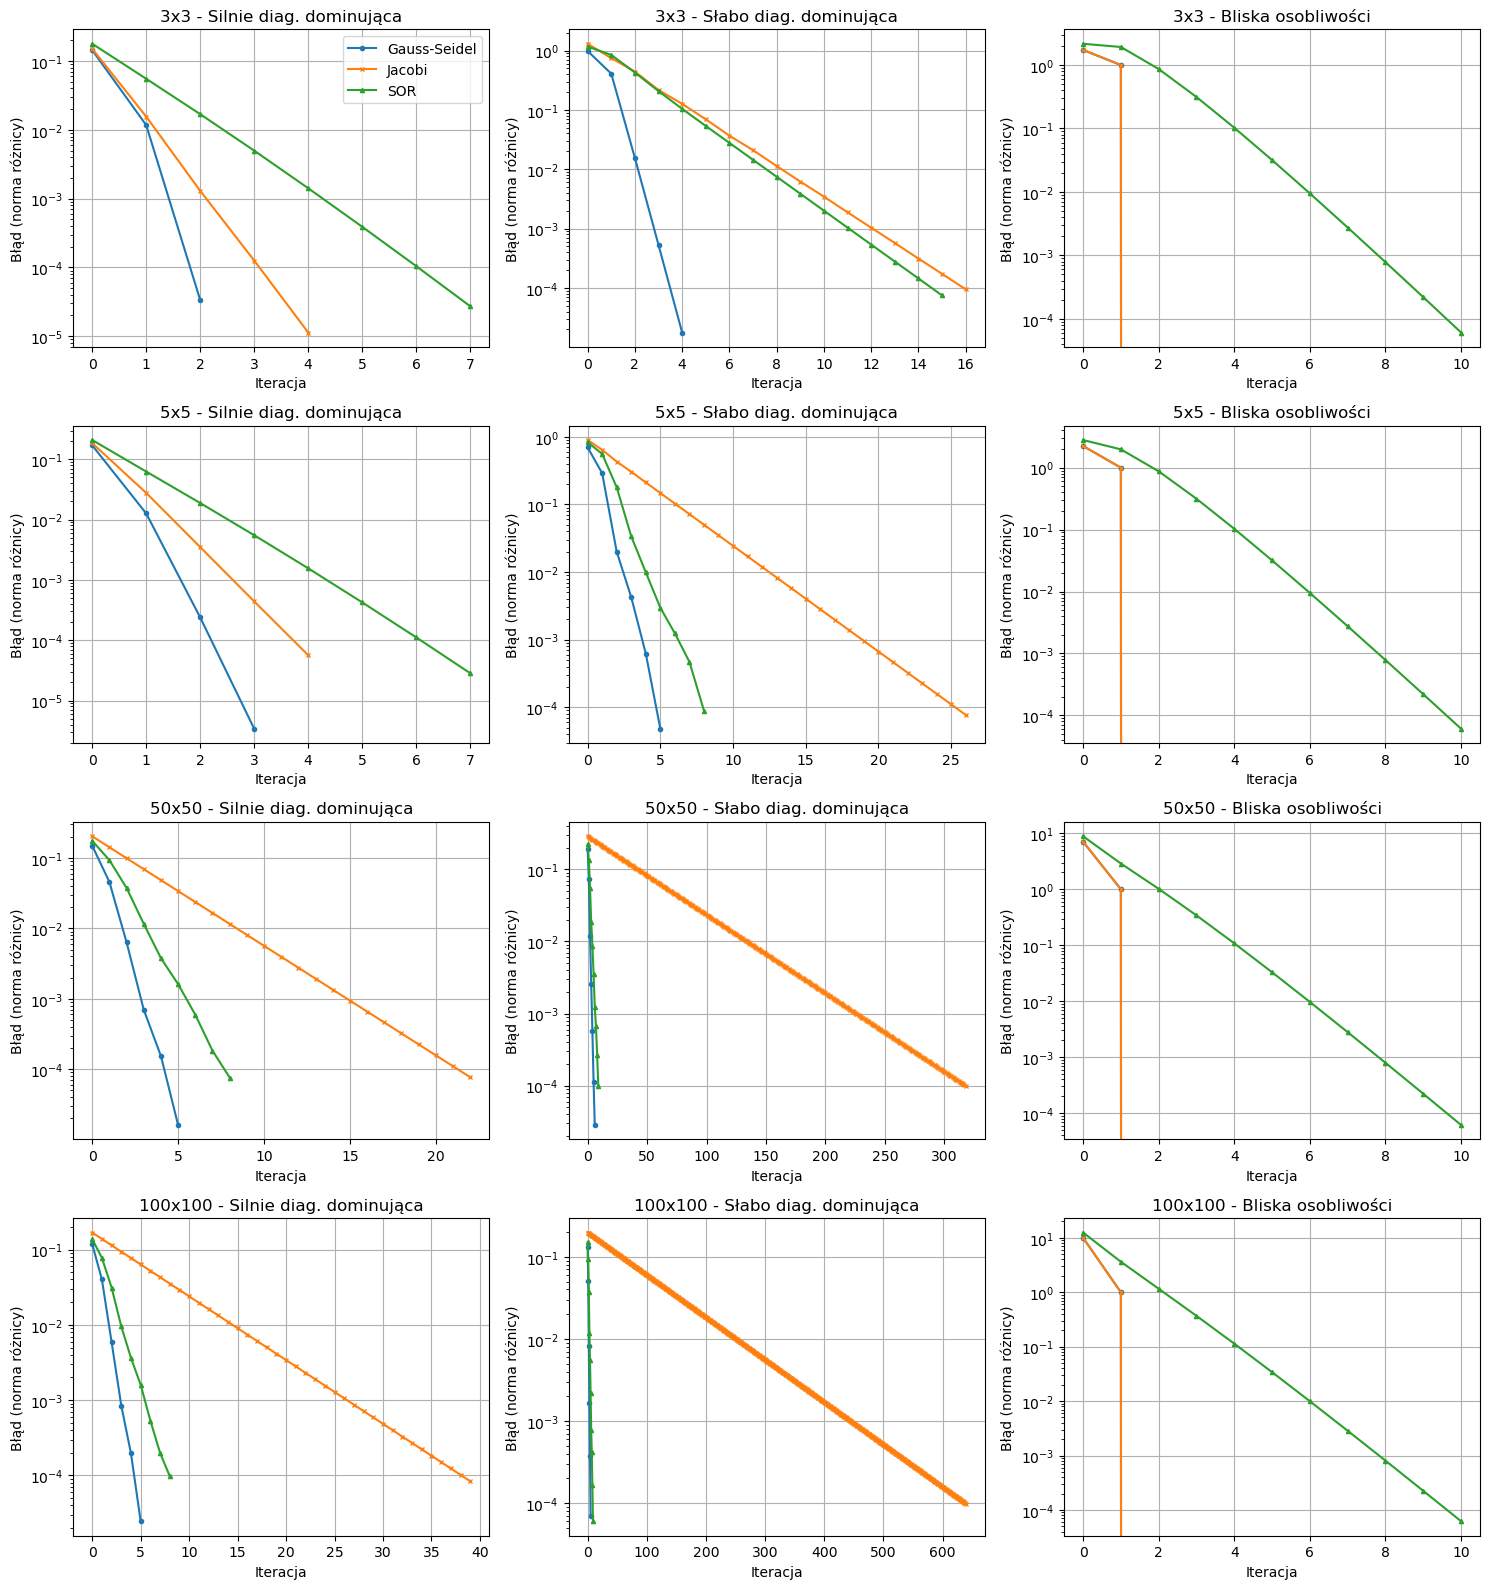

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

def generate_matrices():
    np.random.seed(42)
    sizes = [3, 5, 50, 100]
    matrices = []
    
    for n in sizes:
        A1 = np.random.rand(n, n)
        for i in range(n):
            A1[i, i] = np.sum(np.abs(A1[i])) + 10 
        
        A2 = np.random.rand(n, n)
        for i in range(n):
            A2[i, i] = np.sum(np.abs(A2[i])) + 0.1  
        
        A3 = np.eye(n)
        if n > 1:
            A3[0, 1] = 0.9999  
        
        # Usuwamy A4 (losową)
        
        matrices.append((A1, A2, A3))  # Tylko trzy macierze
        
    return matrices

def jacobi(A, b, tol=1e-8, max_iteration=100_000):
    x = np.zeros_like(b)
    U = np.triu(A, k=1)
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    LU = L + U
    N = np.linalg.inv(D)
    old_x = x.copy()

    errors = []

    for _ in range(max_iteration):
        x = N @ (b - LU @ x)
        err = np.linalg.norm(x - old_x)
        errors.append(err)
        if err < tol:
            return x, errors
        old_x = x.copy()

    print("Warning: Jacobi method did not converge within max iterations.")
    return x, errors

def gauss_seidel(A, b, tol=1e-8, max_iteration=100_000):
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    x = np.zeros_like(b)
    Inverse = np.linalg.inv(np.diag(np.diag(A)) + L)
    old_x = x.copy()

    errors = []

    for _ in range(max_iteration):
        x = Inverse @ (b - U @ x)
        err = np.linalg.norm(x - old_x)
        errors.append(err)
        if err < tol:
            return x, errors
        old_x = x.copy()

    print("Warning: Gauss-Seidel method did not converge within max iterations.")
    return x, errors

def sor(A, b, omega=1.25, tol=1e-8, max_iteration=100_000):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)
    x = np.zeros_like(b)

    errors = []

    for _ in range(max_iteration):
        x_new = x.copy()
        for i in range(n):
            row = A[i]
            sigma = np.dot(row[:i], x_new[:i]) + np.dot(row[i+1:], x[i+1:])
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - sigma)

        err = np.linalg.norm(x_new - x)
        errors.append(err)
        if err < tol:
            return x_new, errors

        x = x_new

    print("Warning: SOR method did not converge within max iterations.")
    return x, errors

def run_analysis(matrices_sets, r_max=1e-4):
    results = []
    for matrices in matrices_sets:  
        res_for_size = []
        for A in matrices: 
            b = np.ones(A.shape[0])
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                _, r_gs = gauss_seidel(A, b, tol=r_max)
                _, r_jac = jacobi(A, b, tol=r_max)
                _, r_sor = sor(A, b, tol=r_max)
            res_for_size.append((r_gs, r_jac, r_sor))
        results.append(res_for_size)
    return results

def plot_convergence(results):
    size_titles = ["3x3", "5x5", "50x50", "100x100"]
    matrix_types = [
        "Silnie diag. dominująca",
        "Słabo diag. dominująca",
        "Bliska osobliwości"
        # Usunięta "Losowa"
    ]
    
    fig, axs = plt.subplots(4, 3, figsize=(15, 16)) 
    
    for i, res_for_size in enumerate(results):  
        for j, (r_gs, r_jac, r_sor) in enumerate(res_for_size): 
            ax = axs[i, j]
            ax.plot(r_gs, label='Gauss-Seidel', marker='o', markersize=3)
            ax.plot(r_jac, label='Jacobi', marker='x', markersize=3)
            ax.plot(r_sor, label='SOR', marker='^', markersize=3)
            ax.set_yscale('log')
            ax.set_title(f"{size_titles[i]} - {matrix_types[j]}")
            ax.set_xlabel("Iteracja")
            ax.set_ylabel("Błąd (norma różnicy)")
            ax.grid(True)
            if i == 0 and j == 0:
                ax.legend()
    
    plt.tight_layout()
    plt.show()

matrices_sets = generate_matrices()
results = run_analysis(matrices_sets, r_max=1e-4)
plot_convergence(results)


# Podsumowanie i wnioski z porównania metod Gaussa-Seidla, Jakobiego i SOR #

Analiza skuteczności metod iteracyjnych Gaussa-Seidla, Jakobiego oraz SOR na różnych typach macierzy pozwala wyciągnąć następujące wnioski:

## Macierze o silnej dominacji diagonalnej ##
- Dla macierzy, których elementy diagonalne zdecydowanie dominują nad pozostałymi, metoda **Gaussa-Seidla** oraz **SOR** radzą sobie bardzo dobrze.
- Metoda **Gaussa-Seidla** wykazuje szybkie zbieżności.
- Metoda **SOR** znajduje się tuż za Gauss-Seidlem, myśle że gdyby użyć jej na większej macierzy to by osiągneła lepsze wyniki.

## Macierze ze słabo dominującą diagonalą ##
- Przy macierzach ze słabą dominacją diagonalną różnice między metodą **SOR** a **Gauss-Seidla** zaczynają się zacierać.
- Metoda **Jakobiego** wymaga znacznie większej liczby iteracji, aby osiągnąć podobny poziom błędu, co świadczy o jej niższej efektywności w takich warunkach.
- Zarówno **SOR**, jak i **Gauss-Seidel** działają stabilnie, jednak przewaga **SOR** jest mniej wyraźna.

## Macierze bliskie osobliwości ##
- Dla macierzy bliskich osobliwości (o bardzo złym uwarunkowaniu) najlepsze rezultaty osiąga metoda **Jakobiego**.
- Przy odpowiedniej liczbie iteracji metoda **Jakobiego** uzyskuje najmniejszy błąd.
- Metoda **SOR** wymaga znacznie dłuższego czasu obliczeniowego.
- Metoda **Gauss-Seidla** często napotyka problemy ze zbieżnością.
- W takich przypadkach metoda **Jakobiego** okazuje się najbardziej stabilna i efektywna.
